<span style="font-size:20px; color:brown; font-weight:bold;">Data Processing</span>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\Afroo\Dataset\Heart-Dataset\heart.csv")
df=pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


What do all the columns mean?
|Features|Description|
|---|---|
|Age | Age of the patient in years
|Sex |gender of patient (0=male, 1=female)
|cp | 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
|trestbps | resting blood pressure in mm Hg
|chol | serum cholesterol in mg/dl
|fbs | fasting blood sugar level, categorized as above 120 mg/dl (1=true, 0=false)
|restecg | resting electrocardiographic results: 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy
|thalach | maximum heart rate achieved during a stress test
|exang  | exrecise included angina (1=yes, 0=no)
|oldpeak |ST depression included by exercise relative to rest
| slope| slope of the peal exercise ST segment. 0: Upsloping, 1: Flat, 2: Downsloping
|ca |number of major vessels(0-4) colores by fluroscopy
|thal | Thalium stress test result: 0: Normal, 1: fixed defect, 2: reversible defect, 3: not described
|target |heart disease status (0=no disease, 1=presence of disease)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has no missing values

In [5]:
for col in ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']:
    print(f" unique value in {col}: {df[col].unique()}")

 unique value in sex: [1 0]
 unique value in cp: [3 2 1 0]
 unique value in fbs: [1 0]
 unique value in restecg: [0 1 2]
 unique value in exang: [0 1]
 unique value in slope: [0 2 1]
 unique value in ca: [0 2 1 3 4]
 unique value in thal: [1 2 3 0]
 unique value in target: [1 0]


<span style="font-size:20px; color:brown; font-weight:bold;">Data Visualization</span>

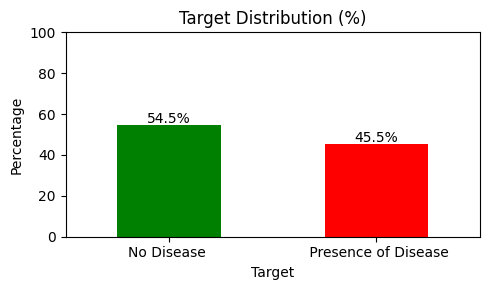

In [11]:
target_counts = df['target'].value_counts(normalize=True) * 100
plt.figure(figsize=(5, 3))
target_counts.plot(kind='bar',color=['green','red'])
plt.title('Target Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Target')
plt.xticks([0, 1], ['No Disease ', ' Presence of Disease'], rotation=0)
plt.ylim(0, 100)

for i, value in enumerate(target_counts):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center')
plt.tight_layout()
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Target Distribution.png",dpi=300)
plt.show()

54.5% of tested people in this data set have no heart disease

cp: Chest pain type Typical angina – chest pain related to decreased blood supply to the heart, Atypical angina – chest pain not related to heart stress, Non-anginal pain – pain not related to the heart, Asymptomatic – no chest pain, but other signs of heart disease.










let's see what is the relation between chest pain and having heart disease

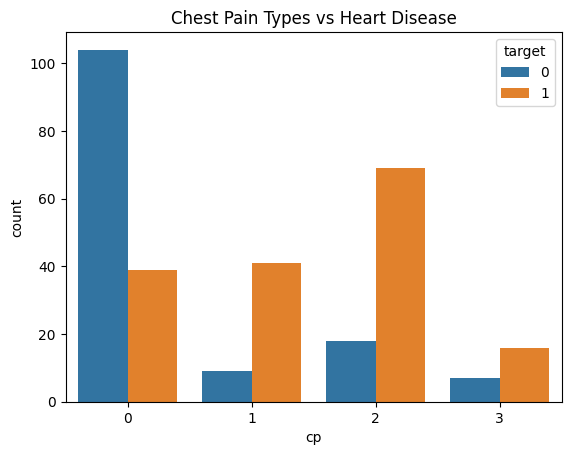

In [14]:
# Count plot for chest pain types
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Types vs Heart Disease")
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Chest Pain vs Heart Disease.png",dpi=300)
plt.show()


Although only chest pain does not indicate a valid outcome of having heart disease or not, graph indicates that people with Typical angina does not have heart disease, and also some patients might not have chest pain, but still they suffer from heart disease

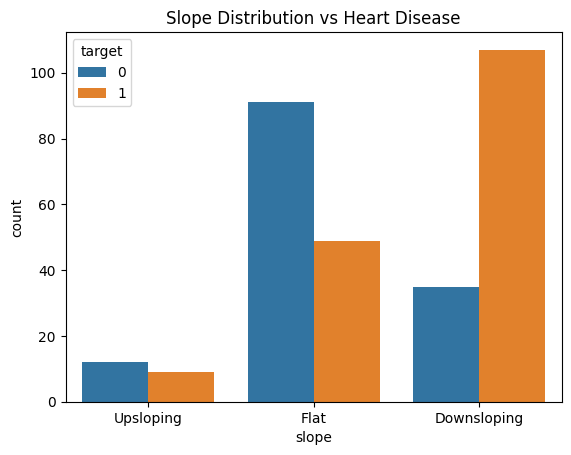

In [15]:
#slop
sns.countplot(x='slope', hue='target', data=df)
plt.title("Slope Distribution vs Heart Disease")
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'], rotation=0)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Slope Distribution vs Heart Disease.png",dpi=300)
plt.show()


The slope of the P wave exercise ST segment is downsloping in the presence of heart disease.

based on the number in the table and naming the column chol, I assume this column is based on total cholesterol, meaning above 240 mg/dl the cholesterol level is dangerous, 200-239 mg/dl is at risk, and below 200 is heart healthy.

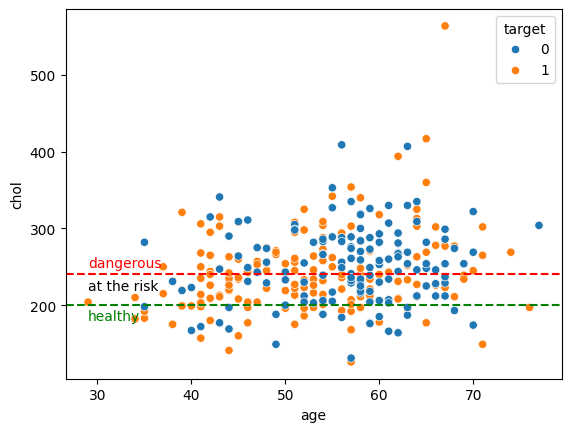

In [16]:
sns.scatterplot(x='age',y='chol',hue='target', data=df)
plt.axhline(y=240, color='red', linestyle='--')
plt.axhline(y=200, color='green', linestyle='--')
plt.text(x=df['age'].min(), y=250, s='dangerous', color='red')
plt.text(x=df['age'].min(), y=180, s='healthy', color='green')
plt.text(x=df['age'].min(), y=220, s='at the risk', color='black')
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Cholesterol vs Target.png",dpi=300)
plt.show()


it seems there is a outlier and needs to be removed

In [33]:
# one outlier must be removed to have clear data
df1=df.copy()
df1=df1[df1['chol']<500]


Let's see if there is a relation between high cholesterol and heart disease

In [34]:
#cholesterol above 240
high_chol_df = df1[df1['chol'] > 240]
# Total number of people with high cholesterol
total_high_chol = len(high_chol_df)
# Number of those who have heart disease
heart_disease_high_chol = len(high_chol_df[high_chol_df['target'] == 1])
percentage = (heart_disease_high_chol / total_high_chol) * 100
print(f"{percentage:.2f}% of people with cholesterol > 240 have heart disease")

47.33% of people with cholesterol > 240 have heart disease


It is interesting that only 47% of people with high cholesterol have heart disease, since what I always heard was that high cholesterol increases the risk of heart disease==> probably there are other important factors.

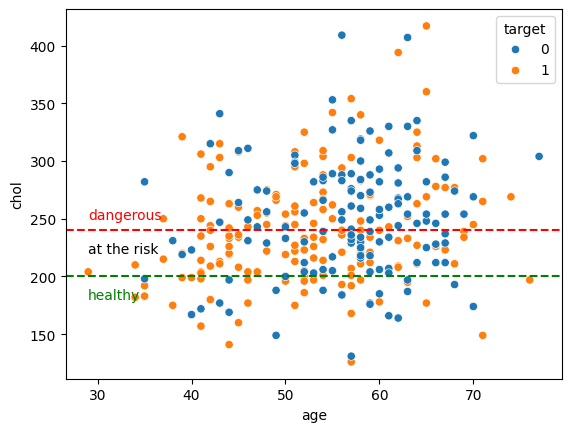

In [35]:
#after removing outlier
sns.scatterplot(x='age',y='chol',hue='target', data=df1)
plt.axhline(y=240, color='red', linestyle='--')
plt.axhline(y=200, color='green', linestyle='--')
plt.text(x=df['age'].min(), y=250, s='dangerous', color='red')
plt.text(x=df['age'].min(), y=180, s='healthy', color='green')
plt.text(x=df['age'].min(), y=220, s='at the risk', color='black')
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Cholesterol vs Target2.png",dpi=300)
plt.show()

By removing outlier the data are closer to each other.

In [36]:
gender_count=df1[df1['sex'].notnull()]
total_gender_count=len(gender_count)
female_count=len(gender_count[gender_count['sex']==1])
precent_female=(female_count/total_gender_count)*100
print(f"{precent_female:.2f} of data is females")

68.54 of data is females


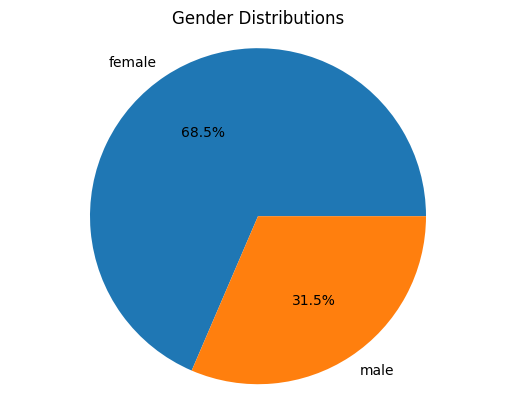

In [37]:
df1.loc[:,'gender_label']=df1['sex'].map({1:'female', 0:'male'})
gender_count=df1['gender_label'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distributions')
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Gender Distribution.png",dpi=300)
plt.show()

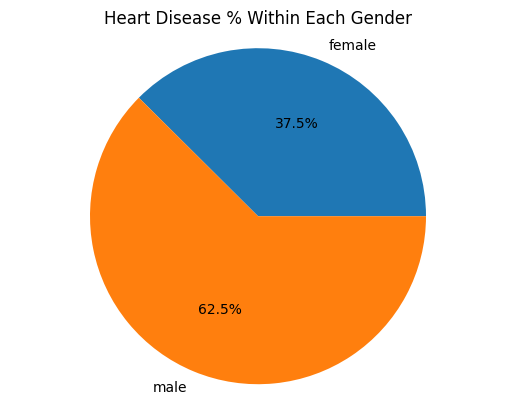

In [38]:
df1['gender_label'] = df1['sex'].map({1: 'female', 0: 'male'})
gender_groups = df1.groupby('gender_label')
# Total count per gender
gender_total = gender_groups.size()
# Heart disease count per gender (target == 1)
gender_disease = gender_groups['target'].sum()
# Percentage of heart disease within each gender
disease_percent = (gender_disease / gender_total) * 100

plt.pie(disease_percent, labels=disease_percent.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Heart Disease % Within Each Gender')
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Gender Distribution vs Target.png",dpi=300)
plt.show()


The majority of tested patients are female, but between the male and female groups, 62.5% of males have heart disease. It shows the risk og happening heart disease might be higher in men.

In [39]:
min_age=df1['age'].min()
max_age=df1['age'].max()
print(min_age)
print(max_age)

29
77


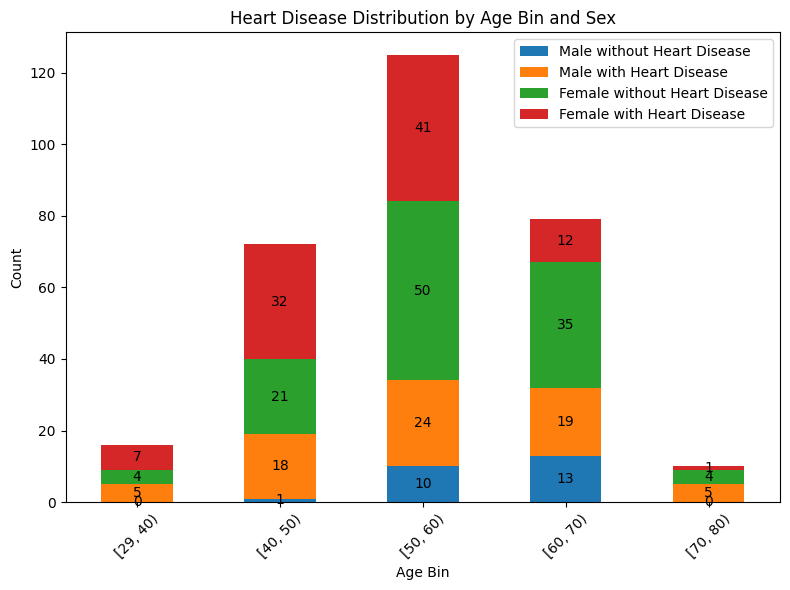

In [40]:
# categorizing age
df1.loc[:, 'age_bin'] = pd.cut(df1['age'], bins=[29, 40, 50, 60, 70, 80], right=False)
#group the data
grouped = df1.groupby(['age_bin', 'sex', 'target'], observed=False).size().reset_index(name='count')
#table with breakdown
pivot_df = grouped.pivot_table(index='age_bin',columns=['sex', 'target'],values='count',fill_value=0,observed=False)
#changing name of columns
sex_map = {0: 'Male', 1: 'Female'}
target_map = {0: 'without Heart Disease', 1: 'with Heart Disease'}
pivot_df.columns = [f"{sex_map[sex]} {target_map[target]}" for sex, target in pivot_df.columns]
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
#count labels to each bar segment
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10)
# visualization
plt.title('Heart Disease Distribution by Age Bin and Sex')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Disease Distribution by Age and Gender.png",dpi=300)
plt.show()

In general, between the ages of 50 and 60, most people in the dataset have heart disease.


Thalach (Maximum Heart Rate Achieved) is a continuous variable obtained during a cardiac stress test, often using a treadmill. It reflects a person's cardiovascular fitness—higher values typically suggest better heart function under physical exertion.

Thal refers to the outcome of a Thallium Stress Test, a form of nuclear imaging that examines blood flow to the heart muscle during exercise. Although thalach and thal measure different aspects of cardiac health, they may correlate because both respond to the same underlying physiological stress:

A lower thalach might occur in individuals with reversible (thal=2) or fixed (thal=1) defects, indicating limited cardiovascular response.

Those with normal thal results (thal=0) are likely to achieve a higher thalach, consistent with good heart performance.

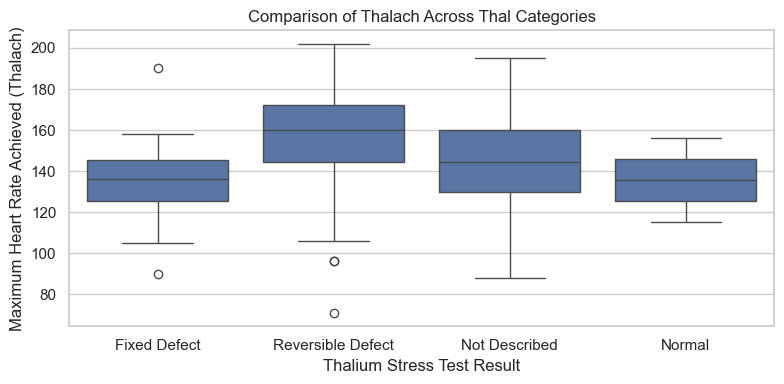

In [41]:
thal_labels = {
    0: 'Normal',
    1: 'Fixed Defect',
    2: 'Reversible Defect',
    3: 'Not Described'
}
df1['thal_label'] = df1['thal'].map(thal_labels)
#  plot style
sns.set(style='whitegrid')
#  boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='thal_label', y='thalach', data=df1)
#  title and labels
plt.title('Comparison of Thalach Across Thal Categories')
plt.xlabel('Thalium Stress Test Result')
plt.ylabel('Maximum Heart Rate Achieved (Thalach)')
plt.tight_layout()
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Talach.png",dpi=300)
plt.show()

In [42]:
df1.groupby('thal_label')['thalach'].median().sort_values(ascending=False)


thal_label
Reversible Defect    160.0
Not Described        144.5
Fixed Defect         136.0
Normal               135.5
Name: thalach, dtype: float64

Reversible defects generally suggest ischemia—meaning the blood flow is reduced during stress but returns to normal at rest.

A higher median thalach could mean that this group tolerates exercise better, reaching higher heart rates.

But it might also indicate that their heart is working harder to compensate for poor blood flow, which isn’t necessarily a good thing.

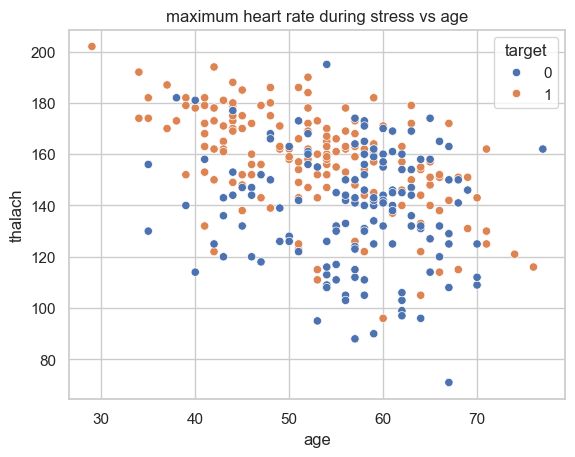

In [43]:
sns.scatterplot(x='age', y='thalach',hue='target', data=df1)
plt.title("maximum heart rate during stress vs age")
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\HR.png",dpi=300)
plt.show()

it seems by increasing age the maximum heart rate decreases and i don't see any outliers

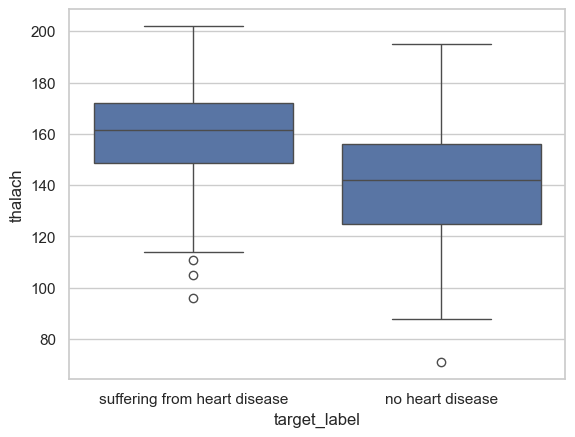

In [44]:
target_label={0:'no heart disease', 1:'suffering from heart disease'}
df1['target_label']=df1['target'].map(target_label)
sns.boxplot(x='target_label', y='thalach', data=df1)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Talach and Heart Disease.png",dpi=300)
plt.show()

In [45]:
# I think the single point outside the boxplot is outlier
df2=df1.copy()
df2=df2[df2['thalach']>80]


The median of thalach for people who are suffering from heart disease is higher than the median for people with no heart disease. meaning maximum heart rate will increase in people with the disease.

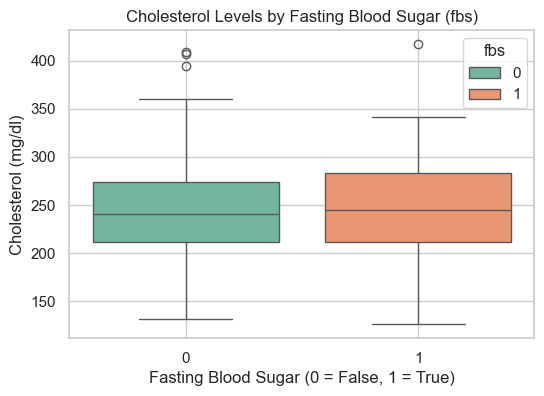

In [46]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df2, x='fbs', y='chol',hue='fbs', palette='Set2')
plt.title('Cholesterol Levels by Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar (0 = False, 1 = True)')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\fbs.png",dpi=300)
plt.show()

In [47]:
# the data was already cleaned but apperantly those dots are still outliers
df3=df2.copy()
df3=df3[df3['chol']<400]

The median of cholesterol in both fasting blood suger is almost equal and maybe the relation between those two is not so important

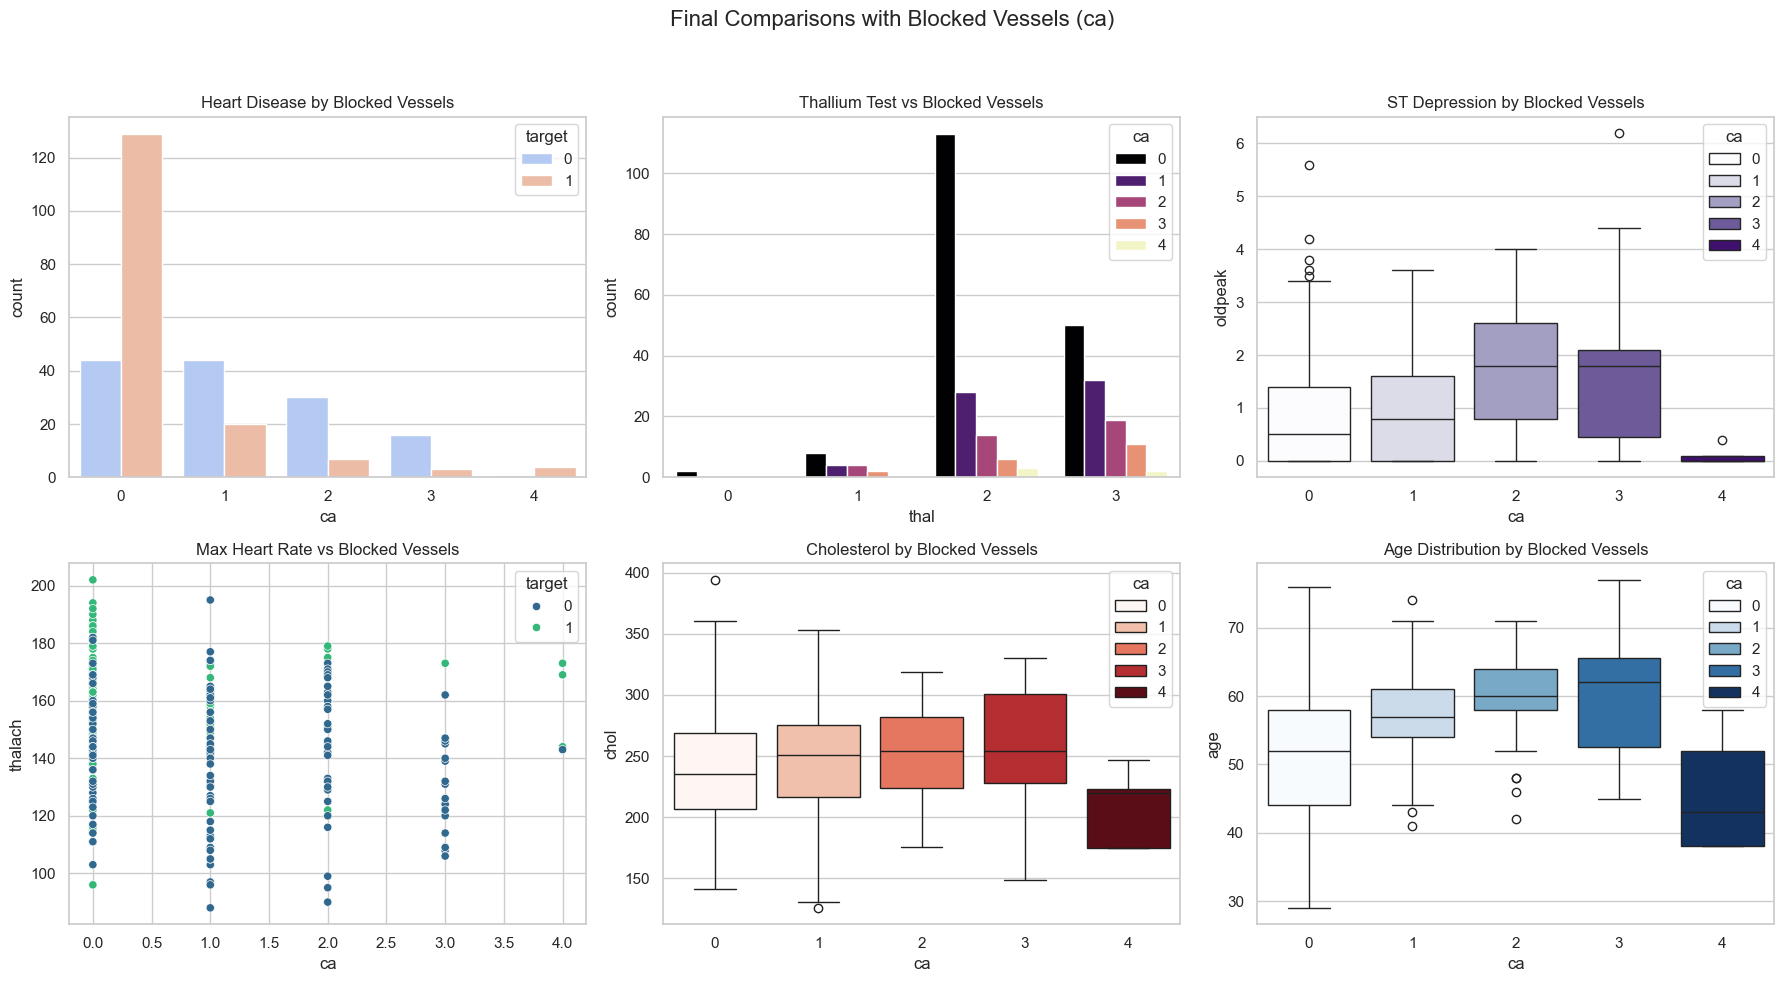

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Final Comparisons with Blocked Vessels (ca)', fontsize=16)

# ca vs target
sns.countplot(data=df3, x='ca', hue='target', ax=axs[0,0], palette='coolwarm')
axs[0,0].set_title('Heart Disease by Blocked Vessels')

# ca vs thal
sns.countplot(data=df3, x='thal', hue='ca', ax=axs[0,1], palette='magma')
axs[0,1].set_title('Thallium Test vs Blocked Vessels')

# ca vs oldpeak
sns.boxplot(data=df3, x='ca', y='oldpeak',hue='ca', ax=axs[0,2], palette='Purples')
axs[0,2].set_title('ST Depression by Blocked Vessels')

# ca vs thalach
sns.scatterplot(data=df3, x='ca', y='thalach', hue='target', ax=axs[1,0], palette='viridis')
axs[1,0].set_title('Max Heart Rate vs Blocked Vessels')

# ca vs cholesterol
sns.boxplot(data=df3, x='ca', y='chol', ax=axs[1,1],hue='ca', palette='Reds')
axs[1,1].set_title('Cholesterol by Blocked Vessels')

# ca vs age
sns.boxplot(data=df3, x='ca', y='age',hue='ca', ax=axs[1,2], palette='Blues')
axs[1,2].set_title('Age Distribution by Blocked Vessels')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\ca.png",dpi=300)
plt.show()


ca=4 acts differently from others. Also, checking references, I did not find references explaining ca=4. Probably there were NaN data since there are not a lot of them, we can drop the rows equal to ca=4.

In [50]:
#dropping rows conatining ca=4
df4=df3.copy()
df4=df4[df4['ca']!=4]

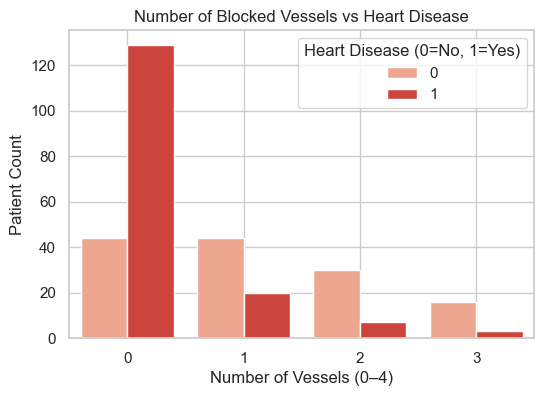

In [51]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df4, x='ca', hue='target', palette='Reds')
plt.title('Number of Blocked Vessels vs Heart Disease')
plt.xlabel('Number of Vessels (0–4)')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease (0=No, 1=Yes)')
plt.grid(True)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Blocked Vessels.png",dpi=300)
plt.show()

When there are no blocked vessels, the majority of patients suffer from heart disease, and by increasing the number of blocked vessels, the risk of having heart disease decreases. ==> The correlation between target and blocked vessels needs to be checked more; it seems there is a negative correlation between those.

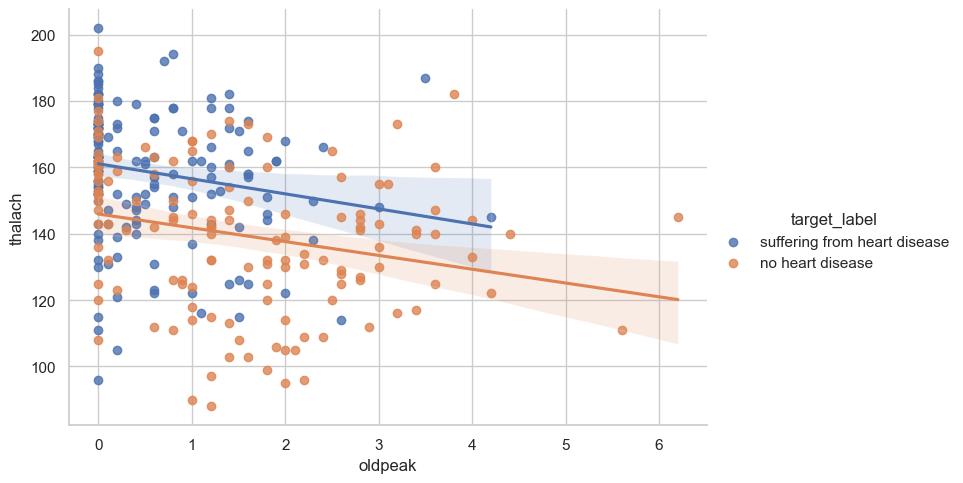

In [52]:
target_label={0:'no heart disease', 1:'suffering from heart disease'}
df3.loc[:,'target_label']=df3['target'].map(target_label)
sns.lmplot(data=df3, x='oldpeak', y='thalach', hue='target_label', height=5, aspect=1.5)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Talach-oldpeak.png",dpi=300)


This graph compares maximum heart rate (thalach) to ST depression (oldpeak), split by heart disease presence (target). People with heart disease show a steep drop in heart rate as oldpeak increases, meaning their cardiovascular performance declines noticeably under stress. Those with no heart disease have a flatter trend, suggesting their heart rate is already compromised, and higher oldpeak values don’t further reduce it much. Overall, oldpeak appears more influential in healthy individuals, while heart-disease patients show consistently low heart response.

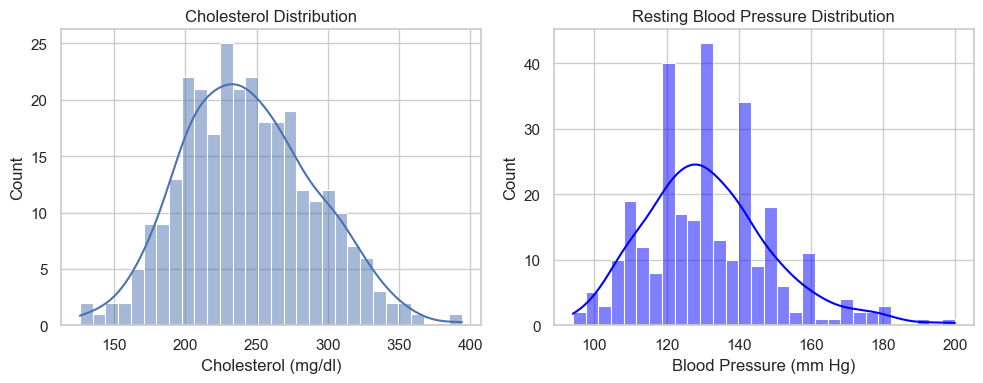

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of Cholesterol
sns.histplot(df4['chol'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Cholesterol Distribution')
axs[0].set_xlabel('Cholesterol (mg/dl)')
axs[0].grid(True)

# Histogram of Blood Pressure
sns.histplot(df4['trestbps'], bins=30, kde=True, ax=axs[1], color='blue')
axs[1].set_title('Resting Blood Pressure Distribution')
axs[1].set_xlabel('Blood Pressure (mm Hg)')
axs[1].grid(True)

plt.tight_layout()
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Histplot.png",dpi=300)
plt.show()


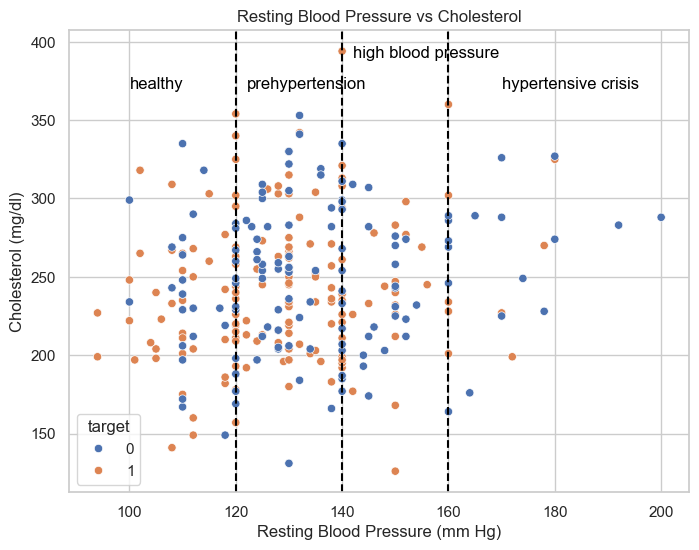

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df4, x='trestbps', y='chol', hue='target')
plt.title('Resting Blood Pressure vs Cholesterol')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Cholesterol (mg/dl)')
plt.axvline(x=120, color='black', linestyle='--')
plt.axvline(x=140, color='black', linestyle='--')
plt.axvline(x=160, color='black', linestyle='--')
plt.text(y=370, x=100, s='healthy', color='black')
plt.text(y=370, x=122, s='prehypertension', color='black')
plt.text(y=390, x=142, s='high blood pressure', color='black')
plt.text(y=370, x=170, s='hypertensive crisis', color='black')
plt.grid(True)
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Blood pressure vs cholesterol.png",dpi=300)
plt.show()


Trestbps above 180 is far away from other data, and also there is a little possibility that the resting blood pressure reaches above 180

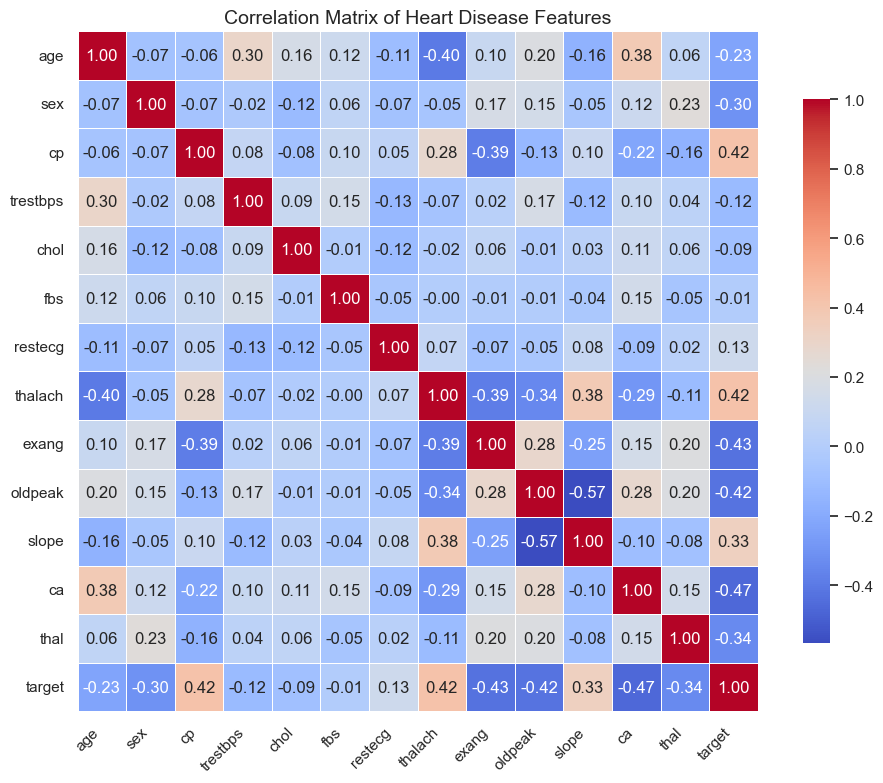

In [56]:
df4=df4[df4['trestbps']<180]
corr_matrix = df4.corr(numeric_only=True)
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)

plt.title('Correlation Matrix of Heart Disease Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\Afroo\Downloads\Heart-figures\Correlation.png",dpi=300)
plt.show()

EDA summary:

* Data size: 303 rows and 14 columns (13 independent + one target variable)
* After data cleaning and removing irrational data points, the data contains 293 and 14 main columns
* Data has no missing values
* Data has 6 numerical and 7 categorical variables
* 54.5% no disease and 45.5% presence of disease==> almost well distributed
* The correlation between features are not really strong but cp, thalach, exang, exang and slope are almost correlated with target
* correlation between chol and target does not show high number as we've already seen in plot